# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [151, 42, 357]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1289,3328,2022,531,255,1774
1,10850,7555,14961,188,6899,46
2,37,1275,22272,137,6747,110


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
Sample 0 is quite low on 'Fresh', a bit low on 'Milk', a bit low on 'Grocery', very low on 'Frozen', very low on 'Detergents_Paper', and a bit high on 'Delicatessen'. This could be some sort of small delicatessen cafe that has a very small bathroom, or no public restroom at all. I'm picturing cheese, meats, and a barista.

Sample 1 is about average on 'Fresh', a bit high on 'Milk', very high on 'Grocery', very low on 'Frozen', very high on 'Detergents_Paper', and very low on 'Delicatessen'. This could be a market that doesn't have a butcher or a frozen section.

Sample 2 is very low on 'Fresh', very low on 'Milk', very high on 'Grocery', very low on 'Frozen', very high on 'Detergents_Paper', and very low on 'Delicatessen'. This strikes me as a corner market that doesn't carry fresh produce but does have large stocks of diapers, toilet paper, and packaged foods or drinks.

The samples are fairly diverse across certain features, but having only three samples means the ranges of values for some features (such as frozen) are not well-represented. For example, all three of the samples I selected have a very low value for 'Frozen'. Comparing the feature values to their respective mean values does help somewhat in determing the type of establishments that are represented, but I feel that it's over-simplified. I wouldn't be surprised if comparing the features across a single sample yielded more accurate results than comparing the values to the overall means for the samples. What I mean is, a small market could be below average on all features but still have a high 'Grocery' or 'Fresh' score relative to its other features. So what I'm really saying is that comparing the feature values against the mean may provide an incomplete picture.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Frozen', axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Frozen'], test_size=0.25, random_state=42)


# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)
prediction = pd.Series(regressor.predict(X_test))

# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import accuracy_score
score = regressor.score(X_test, y_test)
score2 = regressor.score(X_test, y_test)

print "score: {}".format(score)

score: -0.210135890125


In [5]:
importances = regressor.feature_importances_

In [6]:
indices = np.argsort(importances)[::-1]

In [7]:
print "{}, {}".format(indices, importances)

[4 3 0 2 1], [ 0.09589325  0.07301546  0.07431035  0.17573861  0.58104233]


In [8]:
data.axes

[RangeIndex(start=0, stop=440, step=1),
 Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
        u'Delicatessen'],
       dtype='object')]

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
The feature I attempted to predict was 'Frozen'. The reported prediction score was -0.21, which indicates a very low R-squared. As discussed in the hint above, the negative R-squared means that this feature is hard to predict using the other features and so it is an important feature to the model. I'm not sure this feature is necessary for identifying customers' spending habits, but the negative R-squared does suggest that this feature will be quite useful to this end. Some of the other features, such as 'Grocery', have a positive R-squared and so at minimum this 'Frozen' feature is more important than 'Grocery' and a few other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\Users\estam\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


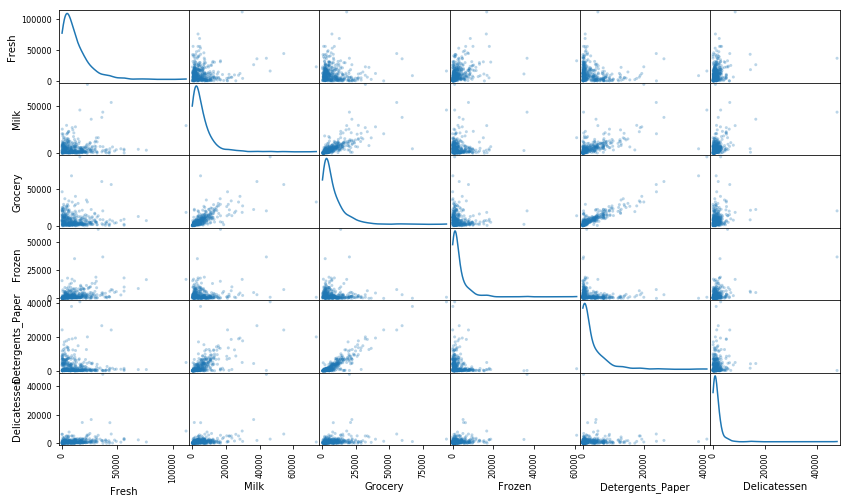

In [9]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
All of the featuers are heavily skewed right, and each chart appears to have outliers. Many of the outliers also appear to have high leverage, which doesn't help the performance of any models built using this dataset. The distributions resemble a normal distribution, but they are missing the left tail of the distribution. Perhaps something like a logarithmic feature transformation would result in the charts being more "normal".

The features that appear to be most correlated are 'Grocery' and 'Detergents_Paper', as well as 'Milk' and 'Grocery'. There are many other features that exhibit some degree of correlation, but these stand out the most.

I chose 'Frozen' as the feature that I attempted to predict, and it looks fairly uncorrelated to other features. 'Fresh' and 'Delicatessen' look like good candidates as well. I think these scatter plots confirm my guess that 'Frozen' is a relevant feature that will benefit the model.

The data for all of these features is distributed most heavily around the bottom left corner of each plot.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\estam\AppData\Local\Continuum\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


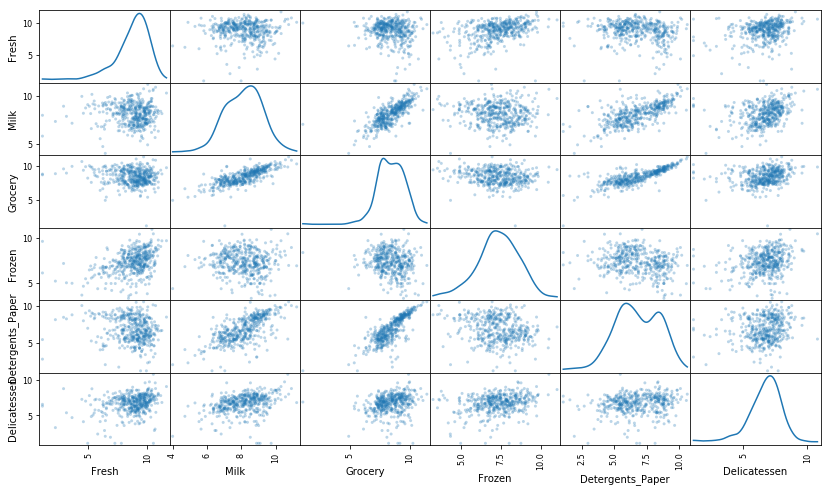

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [11]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7.161622,8.110127,7.611842,6.274762,5.541264,7.480992
1,9.291920,8.929965,9.613202,5.236442,8.839132,3.828641
2,3.610918,7.150701,10.011086,4.919981,8.816853,4.700480


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [12]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = np.subtract(Q3, Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [420, 325, 264, 175, 145, 65, 57, 38,
             154,
             66, 128, 109, 142, 187, 233, 183]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [13]:
for feature in log_data.keys():
    print "{}  mean: {}, median: {}".format(feature, np.mean(log_data[feature]), np.median(log_data[feature]))

Fresh  mean: 8.7305440412, median: 9.04828610539
Milk  mean: 8.12104706712, median: 8.19615927689
Grocery  mean: 8.44116877158, median: 8.46705707218
Frozen  mean: 7.30139573692, median: 7.33038781968
Detergents_Paper  mean: 6.78597202135, median: 6.7050177249
Delicatessen  mean: 6.66513305201, median: 6.87264489503


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
Index 65 is an outlier for both 'Fresh' and 'Frozen', and index 66 is an outlier for both 'Fresh' and 'Delicatessen'. 

In the case of index 65, I did not decide to remove this index because in my opinion it does not have high leverage and, according to the plots for 'Frozen', this point is fairly consistent with the other points on that plot. However, index 66 was removed because it was both an outlier and a highly leveraged point on the plot for 'Fresh' and 'Delicatessen'.

Even if a point is an outlier for two categories, this does not necessarily mean it is a point that needs to be removed. For example, if two features were highly correlated and they both revealed the same point as being an outlier, that does not necessarily mean it is an outlier that will have a huge negative impact on the model. If that outlier falls in line with the general trend of the data, then perhaps it does not warrant removal.

I added several points to the list for removal. My reasoning for this was that I wanted to remove points that deviated greatly from the rest of the transformed plots. However, I did not comb through each feature pair to identify the points for removal. Instead, I focused on 'Frozen' and 'Delicatessen' and their respective feature pairs to visually estimate sections of the plots which contained clear outliers, as well as points that had high leverage and were outliers. I focused on 'Frozen' and 'Delicatessen' because they appear to be the two most relevant features, in the sense that they are least correlated to other features. I estimated the coordinates of these visual points on each plot and compared them to the list of outliers. I then decided to remove the points which fell within the coordinate values of what I had deemed to be outlier or outlier + high leverage, and these are the points which ended up in the list to be removed.

The reason I removed these points is that to my eyes they seemed like points that would cause trouble to an unsupervised learner since they deviated strongly from the rest of the plot. Since our models strive to generalize the data well, it is reasonable to remove points which clearly do not follow the general pattern of our features. This would help an algorithm such as k-means by removing distracting data points from the process of computing the centroid for each cluster.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

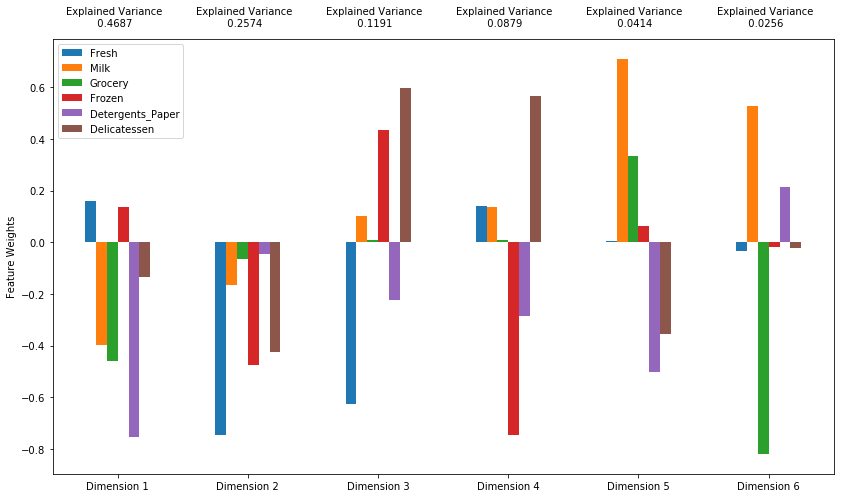

In [14]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)


# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [15]:
print "first principal component: {}".format(pca.explained_variance_ratio_[0])
print "second principal component: {}".format(pca.explained_variance_ratio_[1])
print "first 2 principal components: {}".format(sum(pca.explained_variance_ratio_[0:2]))
print "first 4 principal components: {}".format(sum(pca.explained_variance_ratio_[0:4]))

first principal component: 0.4687179622
second principal component: 0.257426278841
first 2 principal components: 0.726144241041
first 4 principal components: 0.9330503792


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

The first principal componenet explains 46.87% of the variance and the second principal component explains 25.74% of the variance, for a combined 72.61% of variance explained.
The first four principal components combined explain about 93.31% of the variance.

The first dimension has a relatively high absolute value for the weights of 'Milk', 'Grocery', and 'Detergents_Paper'. 
The second dimension has a relatively high absolute value for the weights of 'Fresh', 'Frozen', and 'Delicatessen'.
The third dimension has a relatively high absolute value for the weights of 'Fresh', 'Frozen', and 'Delicatessen'.
The fourth dimension also represents a high absolute value for the weights of 'Frozen' and 'Delicatessen'.

Given that these four dimensions represent a cumulative explained variance of 93.31%, I would say that 'Fresh', 'Frozen', and 'Delicatessen' are strong candidates for categorizing segments of customers.
'Milk' and 'Grocery' are interesting to me because they have high weights on the first dimension (46.87% of variance explained) but they also carry high weights for dimensions 5 & 6, which provide poor explanation of variance. I expect 'Fresh', 'Frozen', and 'Delicatessen' to be the most impactful features in our model.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.7718,1.5027,1.2570,1.3593,0.0180,0.4612
1,-2.2570,1.5486,-3.3452,-0.4430,0.8461,-0.0068
2,-2.7928,5.8480,0.4260,-0.7514,-0.6311,-1.0962


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.7718,1.5027
1,-2.2570,1.5486
2,-2.7928,5.8480


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

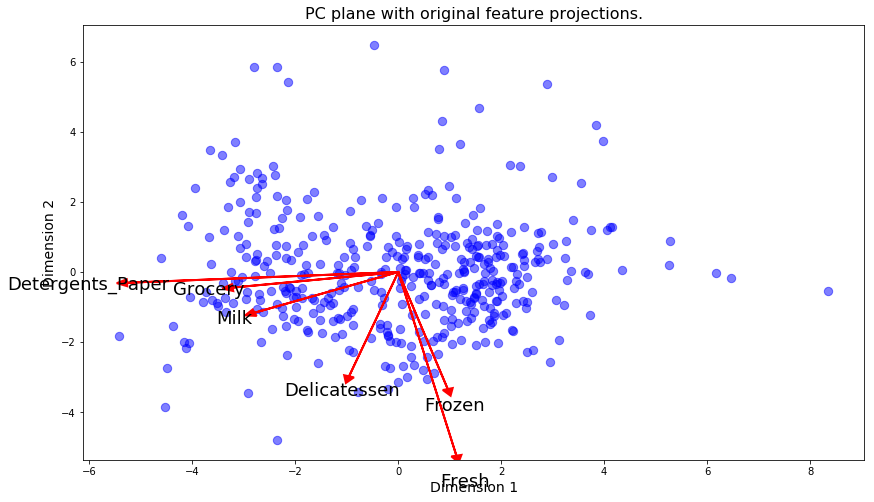

In [19]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

K-Means is a solid choice as a clustering algorithm if certain assumptions are met. If we expect our clusters to contain the same number of customers, and we expect that the clusters will have approximately equal variances, then K-Means may produce a good model for us that converges quickly to a solution.

Some red flags that K-Means would not be appropriate would include:
(a) The distributions of customers within clusters is not 'spherical' or centered around an observable centroid
(b) Some clusters are expected to contain far fewer customers than other clusters. For example, let's say we expect 80% of our customers to land in 'cluster 1' and 20% to land in 'cluster 2'. This would not be ideal for K-Means.
(c) Some clusters are expected to be very dense, while others are spread out. This could be bad because if 'cluster 1' is very dense and 'cluster 2' is very spread out, it may be obvious from a visual perspective that a customer belongs to 'cluster 2' but they could still be assigned to 'cluster 1' merely because they are closer to the 'cluster 1' centroid.

The advantages to using a GMM clustering aglorithm are that it is more dynamic, and it is more sophisticated than K-means in the sense that it can tackle higher-dimensionality clustering problems. GMM may avoid some of the pitfalls of K-Means clustering due to its clusters being described by gaussian distributions. The distributions vary for different clusters, and so GMM is better equipped to assign data points to clusters when each cluster is not expected to have the same density or variance. GMM also allows for 'soft' clustering, where a customer could belong to multiple clusters.

For the problem we are attempting to solve, I think K-Means is a good starting point. There are no red flags that jump out at me that break down the K-Means assumptions to the point of it not being useful. If it does perform very poorly, then we can always up the complexity and use a more sophisticated algorithm such as GMM. In this problem I think it's best to stick to hard clustering, and at this point there is no reason to assume that K-Means will be inadequate for clustering the customers.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def explore_kmeans(k):

# TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=k, random_state=42)
    clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, random_state=42)

    print "score for {} clusters: {}".format(k, score)
    for i, center in enumerate(centers):
        print "center {}: {}".format(i+1, center)
    print "\n"
    
    return preds, centers

for i in range(2,7):
    explore_kmeans(i)
    

score for 2 clusters: 0.428970768908
center 1: [-2.20770293  0.15308055]
center 2: [ 1.4631443  -0.10145339]


score for 3 clusters: 0.397385342925
center 1: [-1.7770075   2.21113208]
center 2: [ 1.69401757 -0.04599533]
center 3: [-1.77526487 -1.05692161]


score for 4 clusters: 0.329180337321
center 1: [ 0.85435961 -0.95251133]
center 2: [-2.25305692 -0.83299989]
center 3: [ 2.25976168  0.96520263]
center 4: [-2.14958045  2.09668862]


score for 5 clusters: 0.350371722736
center 1: [ 0.69737774  0.77293318]
center 2: [-2.47281628  2.39904345]
center 3: [-2.28354505 -0.79545297]
center 4: [ 1.0926732  -1.36064605]
center 5: [ 3.28106632  0.77153256]


score for 6 clusters: 0.349219474366
center 1: [-2.66647948  1.6054304 ]
center 2: [ 0.45773513  0.62618276]
center 3: [-2.24594227 -1.01524918]
center 4: [ 0.91334923  4.63657643]
center 5: [ 0.94011841 -1.53907367]
center 6: [ 2.78270009  0.23643534]




In [49]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def explore_gmm(k):

# TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer2 = GaussianMixture(k, random_state=42)
    clusterer2.fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds2 = clusterer2.predict(reduced_data)

# TODO: Find the cluster centers
    centers2 = clusterer2.means_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds2 = clusterer2.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score2 = silhouette_score(reduced_data, preds2, random_state=42)

    print "score for {} gmm components: {}".format(k, score2)
    for i, center in enumerate(centers2):
        print "mean {}: {}".format(i+1, center)
    print "\n"
    
    return preds2, centers2

for i in range(2, 7):
    explore_gmm(i)

score for 2 gmm components: 0.413655395917
mean 1: [-2.45138521  0.48198109]
mean 2: [ 1.01148213 -0.19887338]


score for 3 gmm components: 0.411244749364
mean 1: [ 0.14351159  0.94096138]
mean 2: [ 1.08535972 -0.3155894 ]
mean 3: [-2.34564274  0.15691794]


score for 4 gmm components: 0.308703732866
mean 1: [-0.36028862  1.94374683]
mean 2: [ 1.1473882  -0.65964544]
mean 3: [-2.25147132 -0.10853708]
mean 4: [ 1.39800173  0.40588416]


score for 5 gmm components: 0.261634449512
mean 1: [-2.77856798  1.60718005]
mean 2: [-0.12896511  0.02663173]
mean 3: [-2.32575682 -0.44830073]
mean 4: [ 1.43705157 -0.74262577]
mean 5: [ 1.86859243  0.95144798]


score for 6 gmm components: 0.296900025648
mean 1: [-2.68153479  1.52437452]
mean 2: [ 0.19208501  0.61442851]
mean 3: [-2.08364229 -0.6943239 ]
mean 4: [ 1.1652766  -1.43272736]
mean 5: [ 1.67205944  0.18835787]
mean 6: [ 2.56441176  3.05392958]




### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
Using K-means, the results were best using two clusters with a score of 0.42897.
Increasing the number of clusters resulted in lower scores, dipping to 0.397 with three clusters and down to 0.329 with four clusters. It looks like in this case less is more; two clusters yields the best score.

Out of curiosity I tried the Gaussian Mixture Model as well, and two clusters was also the most performant for that model. It's interesting that the GMM in this case did not perform as well as the KMeans algorithm. I was surprised by this. I would have thought the GMM would perform slightly better than KMeans.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [38]:
preds, centers = explore_kmeans(2)


score for 2 clusters: 0.428970768908
center 1: [-2.20770293  0.15308055]
center 2: [ 1.4631443  -0.10145339]




In [50]:
preds2, centers2 = explore_gmm(2)

score for 2 gmm components: 0.413655395917
mean 1: [-2.45138521  0.48198109]
mean 2: [ 1.01148213 -0.19887338]




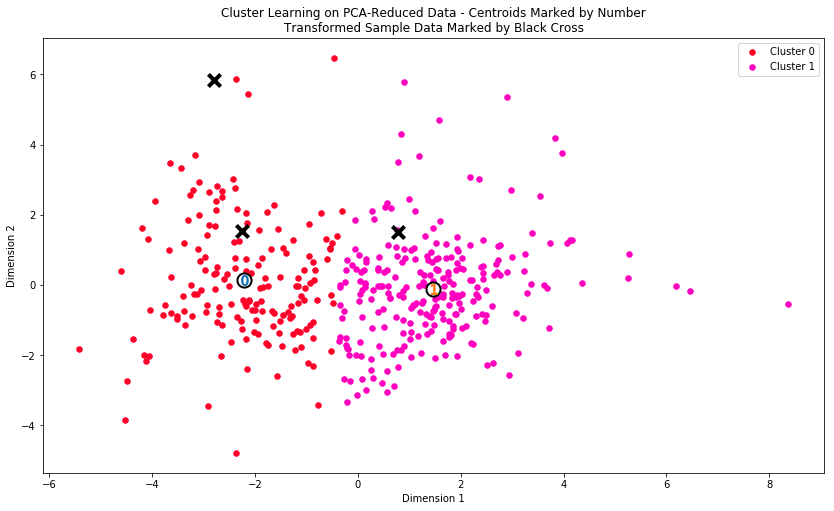

In [40]:
# KMeans Clustering
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

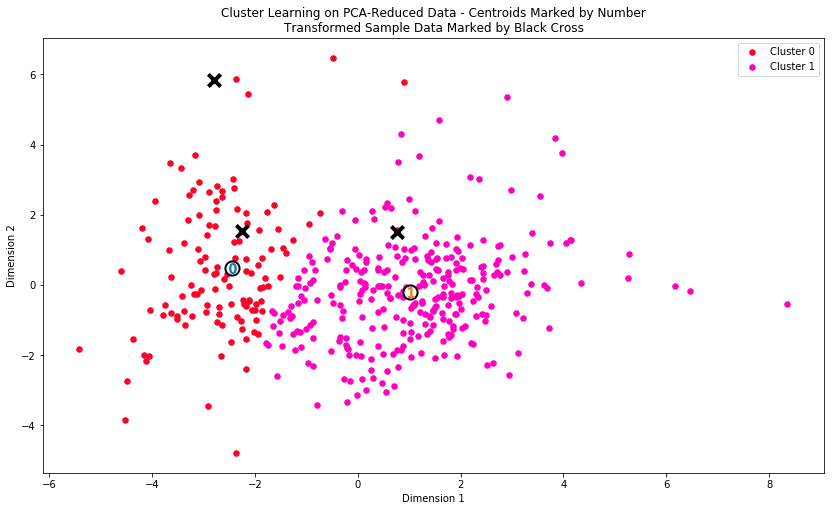

In [51]:
# GMM Clustering
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds2, centers2, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [26]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)
log_centers2 = pca.inverse_transform(centers2)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)
true_centers2 = np.exp(log_centers2)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,4035.0,7694.0,12316.0,1080.0,4543.0,1054.0
Segment 1,8824.0,1858.0,2315.0,2017.0,290.0,711.0


In [27]:
# Display the true centers for GMM
segments2 = ['Segment {}'.format(i) for i in range(0,len(centers2))]
true_centers2 = pd.DataFrame(np.round(true_centers2), columns = data.keys())
true_centers2.index = segments2
display(true_centers2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3034.0,8029.0,13491.0,893.0,5380.0,947.0
Segment 1,8824.0,2261.0,2867.0,1986.0,409.0,788.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
I will use the following guidelines to evaluate each segment against the statistical descriptions we generated earlier in the project.
LOW - Below Mean, Below Median
MID - Close to Mean, Close to Median
HIGH - Above Mean, Above Median

To generalize, Segment 0 is LOW on 'Fresh', HIGH on 'Milk', HIGH on 'Grocery', LOW on 'Frozen' (although it is above median), very HIGH on 'Detergents_Paper', and LOW on 'Delicatessen'.
What kind of establishment carries a lot of milk, groceries, detergent paper, and a small amount of frozen goods? This could be a corner market that provides a lot of the basic needs for families without diving into the depth a larger grocery store would provide.

To generalize, Segment 1 is LOW on 'Fresh' (although it is above median), LOW on 'Milk', very LOW on 'Grocery', LOW on 'Frozen' (although above median), very LOW on 'Detergents_Paper', and LOW on 'Delicatessen'.
Since this segment is low on everything according to the mean values, this indicates two things to me. First of all, this may be a small specialty shop that does not spend as much as larger establishments. Second, we may be able to better describe this segment by using the median values than by using the mean values. When considering the median values, the features that draw attention are 'Fresh', 'Frozen', and 'Delicatessen'. This would indicate to me that this could be some sort of small dessert shop, which has fresh goods such as berries, a good amount of frozen novelties, and carries a significant portion of delicatessen items (as a % of total inventory).

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [33]:
# Redo code from earlier, since the sample_preds variable was created locally within a function

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, random_state=42)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, random_state=42)

In [34]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [31]:
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1289,3328,2022,531,255,1774
1,10850,7555,14961,188,6899,46
2,37,1275,22272,137,6747,110


**Answer:**

Sample 0: 'Fresh' -> 0, 'Milk' -> 1, 'Grocery' -> 1, 'Frozen' -> 0, 'Detergents_Paper' -> 1, 'Delicatessen' -> 0
Sample 1: 'Fresh' -> 1, 'Milk' -> 0, 'Grocery' -> 0, 'Frozen' -> 0, 'Detergents_Paper' -> 0, 'Delicatessen' -> 1
Sample 2: 'Fresh' -> 0, 'Milk' -> 1, 'Grocery' -> 0, 'Frozen' -> 0, 'Detergents_Paper' -> 0, 'Delicatessen' -> 1

It appears that Sample 0 is split down the middle, so it's 50/50 to me on which segment that sample will be assigned to.
Sample 1 looks to me like a 'Segment 0' data point, and Sample 2 also looks like a 'Segment 0' data point. This assessment is based off the features of these data points being closer (generally) to the average values reflected by 'Segement 0' compared to 'Segment 1'.

Comparing my estimates to those seen above in 'In [34]', I correctly classified 'Sample 1' and 'Sample 2'. 'Sample 0' has landed in 'Segment 1'.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

First of all, I don't think we can assume that the delivery change will impact all customers equally. That remains true even within the two different segments. After all, these segments are an aggregate average of the various customers within them.
That being said, one segment may be impacted on average more than the other segment.
Segment 0 indicates high volumes of 'Milk', 'Grocery', and 'Detergents_Paper' are being sold. Unless these customers have very large inventories of these items in reserve, it stand to reason that these customers will benefit from having more frequent deliveries.
On the other hand, more frequent deliveries are not necessarily justified. In the spirit of A/B tests, it may be helpful to increase the frequency of deliveries to a percentage of the customer populations in each respective customer segment and then evaluate whether or not the new delivery schedule is better or worse for the test group compared to the control group.
If one (or both) of the segments shows statistically significant improvements for the test group (customers who received the altered delivery schedule) versus the control group, then we can conclude that on average it is better for this segment to receive the modified delivery schedule.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
A supervised learning algorithm such as logistic regression could be used to predict the target variable of 'customer segment'. In this case logistic regression works because there are only two segments: the customer is either in 'Segment 0' or 'Segment 1'. To be specific, the output of the logistic regression could be focused on answering the question of "does the customer land in 'Segment 0' or not?". This would produce a yes/no binary situation. Each feature (estimated product spend) would factor into the final outcome of which segment the customer belongs to.

As an aside, it also looks like we could use the KMeans clusterer to predict the segments for our new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

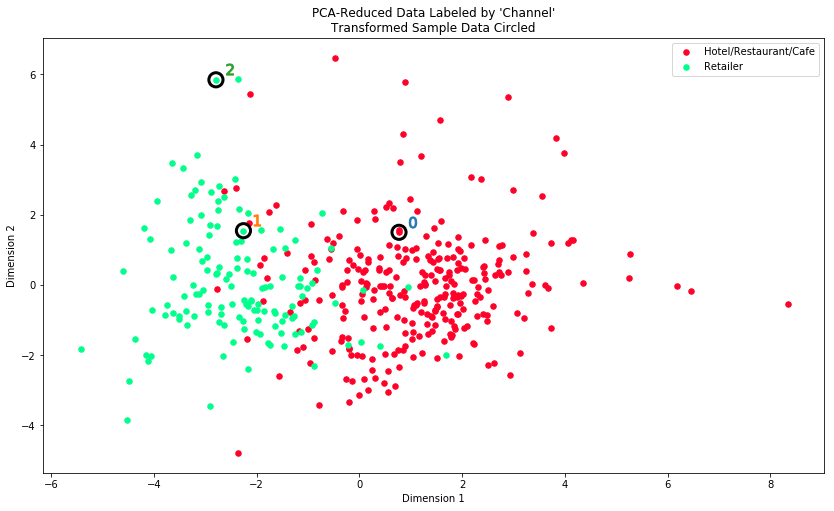

In [35]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
The custering algorithm and number of custers seems to fall pretty well in line with the underlying distribution of Hotel/Restaurant/Cafes customers and Retailer customers. Obviously there is some middle ground where some of the data points are incorrectly classified, but we can see a clear trend of green (Retailers) on the left and red (Hotel/Restaurant/Cafes) on the right. We would probably need to integrate a deeper industry knowledge and do some feature engineering if we wanted to build a better model that is better at distinguishing between these two customer varieties. 

There are certainly customers that would be classified as purely 'Retailers' and purely 'Hotel/Restaurants/Cafes' by this distribution. Some, however, seem to be struggling through an identity crisis (such as the green retailer dot resting in the center of the red clump of 'Hotel/Restaurant/Cafes' cluster).

I do consider these classifications to be consistent with the previous definition of customer segments. Not in terms of my own qualitative descriptions, but in terms of the KMeans model mathematically distinguishing between the customers. While I had no idea that the underlying data was separating retailers from hotels and restaurants, the algorithm was able to generalize and build a fairly good model that buckets customers into two arbitrary groups. The model isn't perfect, but given the lack of industry expertise and feature engineering, this model has done a decent job of picking up on the existence of two distinct customer segments and accurately classifying which cluster each customer belongs to.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.